# Dataset

https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset


In [76]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rabieelkharoua/alzheimers-disease-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/alzheimers-disease-dataset


#🧾 Patient Dataset Attribute Descriptions


## 📌 Patient Information
| **Feature** | **Description**                                                |
| ----------- | -------------------------------------------------------------- |
| `PatientID` | Unique ID assigned to each patient (ranges from 4751 to 6900). |

-------------------------------------------------------------------
## 🍎 🧍‍♂️ Demographic Details

| **Feature**      | **Description**                                                               |
| ---------------- | ----------------------------------------------------------------------------- |
| `Age`            | Age of the patient (60 to 90 years).                                          |
| `Gender`         | Gender of the patient: 0 = Male, 1 = Female.                                  |
| `Ethnicity`      | Ethnic background: 0 = Caucasian, 1 = African American, 2 = Asian, 3 = Other. |
| `EducationLevel` | Education level: 0 = None, 1 = High School, 2 = Bachelor's, 3 = Higher.       |

-----------------------------------------------------
## 🍎 Lifestyle Factors

| **Feature**          | **Description**                           |
| -------------------- | ----------------------------------------- |
| `BMI`                | Body Mass Index (15 to 40).               |
| `Smoking`            | Smoking status: 0 = No, 1 = Yes.          |
| `AlcoholConsumption` | Weekly alcohol intake (0 to 20 units).    |
| `PhysicalActivity`   | Weekly physical activity (0 to 10 hours). |
| `DietQuality`        | Diet quality score (0 to 10).             |
| `SleepQuality`       | Sleep quality score (4 to 10).            |

-------------------------------------------------------------------
## 🏥 Medical History

| **Feature**               | **Description**                                   |
| ------------------------- | ------------------------------------------------- |
| `FamilyHistoryAlzheimers` | Family history of Alzheimer’s: 0 = No, 1 = Yes.   |
| `CardiovascularDisease`   | Cardiovascular disease presence: 0 = No, 1 = Yes. |
| `Diabetes`                | Diabetes presence: 0 = No, 1 = Yes.               |
| `Depression`              | Depression presence: 0 = No, 1 = Yes.             |
| `HeadInjury`              | History of head injury: 0 = No, 1 = Yes.          |
| `Hypertension`            | Hypertension presence: 0 = No, 1 = Yes.           |

-------------------------------------------------------------------
## 🔬 Clinical Measurements

| **Feature**                | **Description**                         |
| -------------------------- | --------------------------------------- |
| `SystolicBP`               | Systolic blood pressure (90–180 mmHg).  |
| `DiastolicBP`              | Diastolic blood pressure (60–120 mmHg). |
| `CholesterolTotal`         | Total cholesterol (150–300 mg/dL).      |
| `CholesterolLDL`           | LDL cholesterol (50–200 mg/dL).         |
| `CholesterolHDL`           | HDL cholesterol (20–100 mg/dL).         |
| `CholesterolTriglycerides` | Triglycerides level (50–400 mg/dL).     |

-------------------------------------------------------------------
## 🧠 Cognitive and Functional Assessments

| **Feature**            | **Description**                                                        |
| ---------------------- | ---------------------------------------------------------------------- |
| `MMSE`                 | Mini-Mental State Exam score (0–30). Lower = worse cognitive function. |
| `FunctionalAssessment` | Functional ability score (0–10). Lower = more impairment.              |
| `MemoryComplaints`     | Memory complaints: 0 = No, 1 = Yes.                                    |
| `BehavioralProblems`   | Behavioral problems: 0 = No, 1 = Yes.                                  |
| `ADL`                  | Activities of Daily Living score (0–10). Lower = more difficulty.      |

-------------------------------------------------------------------
## ⚠️ Symptoms

| **Feature**                 | **Description** |
| --------------------------- | --------------- |
| `Confusion`                 | 0 = No, 1 = Yes |
| `Disorientation`            | 0 = No, 1 = Yes |
| `PersonalityChanges`        | 0 = No, 1 = Yes |
| `DifficultyCompletingTasks` | 0 = No, 1 = Yes |
| `Forgetfulness`             | 0 = No, 1 = Yes |

-------------------------------------------------------------------
##✅ Diagnosis Information

| **Feature** | **Description**                                   |
| ----------- | ------------------------------------------------- |
| `Diagnosis` | Diagnosis of Alzheimer’s Disease: 0 = No, 1 = Yes |

-------------------------------------------------------------------
## 🔒 Confidential Information

| **Feature**      | **Description**                                 |
| ---------------- | ----------------------------------------------- |
| `DoctorInCharge` | Confidential info: value is always "XXXConfid". |



# Import Libraries and Loading Data


In [77]:
!pip install catboost -q

In [78]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from scikit-learn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
# Evaluation metrics
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score,
                             classification_report, confusion_matrix, roc_auc_score, roc_curve)
from sklearn.preprocessing import label_binarize
# SMOTE and Pipeline to avoid data leakage during cross-validation
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Additional models: XGBoost, LightGBM, CatBoost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
import time
from tqdm import tqdm
from sklearn.impute import SimpleImputer
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import zscore
from sklearn.preprocessing import label_binarize
import warnings
import os

warnings.filterwarnings('ignore')

# Dataset Overview



In [79]:
data=pd.read_csv(f"{path}/alzheimers_disease_data.csv")
data.head(10)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
5,4756,86,1,1,1,30.626886,0,4.140144,0.211062,1.584922,...,0,0,9.015686,1,0,0,0,0,0,XXXConfid
6,4757,68,0,3,2,38.387622,1,0.646047,9.257695,5.897388,...,0,0,9.236328,0,0,0,0,1,0,XXXConfid
7,4758,75,0,0,1,18.776009,0,13.723826,4.649451,8.341903,...,0,0,4.517248,1,0,0,0,1,1,XXXConfid
8,4759,72,1,1,0,27.833188,0,12.167848,1.531360,6.736882,...,0,1,0.756232,0,0,1,0,0,0,XXXConfid
9,4760,87,0,0,0,35.456302,1,16.028688,6.440773,8.086019,...,0,1,4.554394,0,0,0,0,0,0,XXXConfid


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [81]:
data.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0


In [82]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


In [83]:
sum(data.duplicated())

0

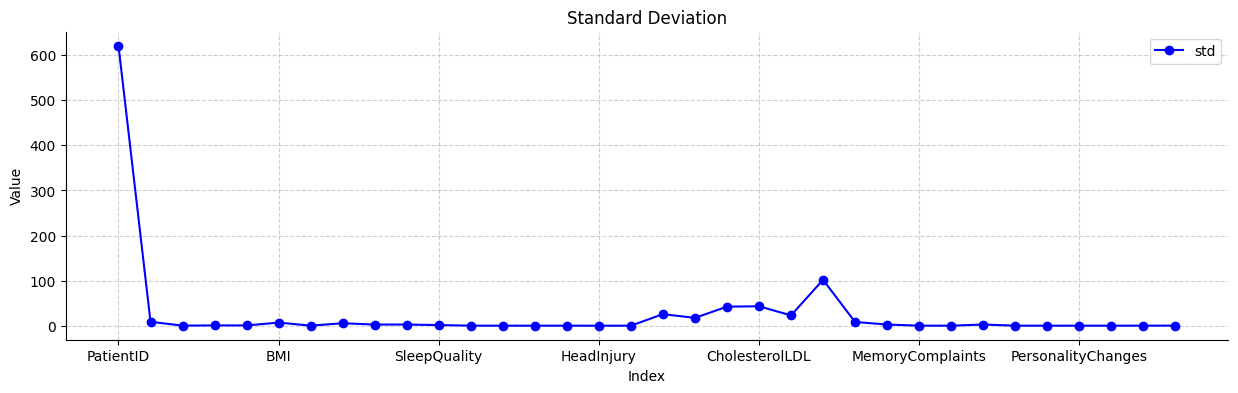

In [84]:
data.describe().T.plot(kind='line', y='std', figsize=(15, 4), title='Standard Deviation', color='b', linestyle='-', marker='o')

plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

In [85]:
numerical_columns = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE']
categorical_columns = ['Gender', 'Ethnicity', 'Diagnosis', 'DoctorInCharge']

In [86]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((data[numeric_columns] < (Q1 - 1.5 * IQR)) | (data[numeric_columns] > (Q3 + 1.5 * IQR)))
outliers_count = outliers.sum()
print(f"Outliers count:\n{outliers_count}")

Outliers count:
PatientID                      0
Age                            0
Gender                         0
Ethnicity                    211
EducationLevel                 0
BMI                            0
Smoking                        0
AlcoholConsumption             0
PhysicalActivity               0
DietQuality                    0
SleepQuality                   0
FamilyHistoryAlzheimers        0
CardiovascularDisease        310
Diabetes                     324
Depression                   431
HeadInjury                   199
Hypertension                 320
SystolicBP                     0
DiastolicBP                    0
CholesterolTotal               0
CholesterolLDL                 0
CholesterolHDL                 0
CholesterolTriglycerides       0
MMSE                           0
FunctionalAssessment           0
MemoryComplaints             447
BehavioralProblems           337
ADL                            0
Confusion                    441
Disorientation             

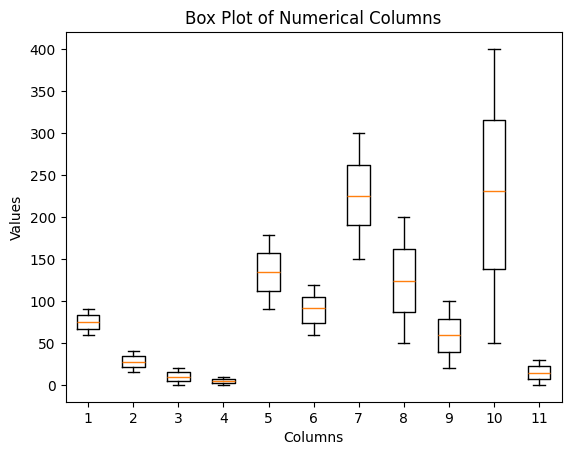

In [87]:
plt.boxplot(data[numerical_columns])
plt.title('Box Plot of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

# EDA

# What is the age distribution of patients?

---



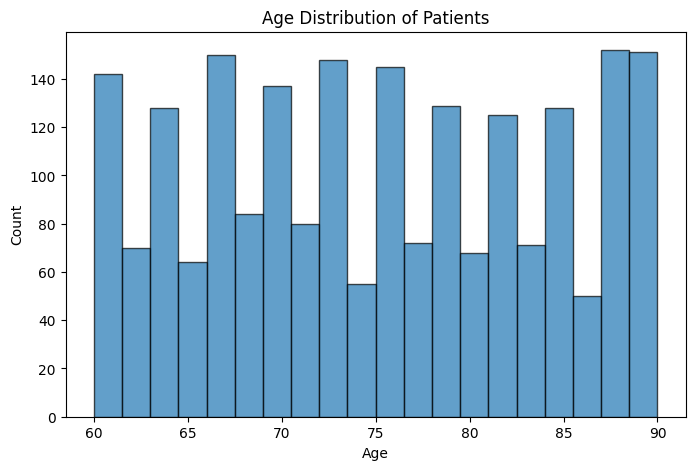

In [88]:
plt.figure(figsize=(8, 5))
plt.hist(data['Age'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Patients')
plt.show()

# How does Body Mass Index (BMI) affect diagnosis?

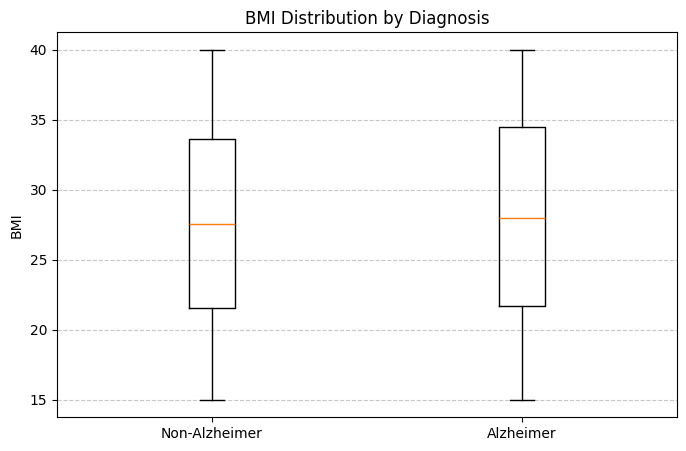

In [89]:
plt.figure(figsize=(8, 5))
plt.boxplot([data[data['Diagnosis'] == 0]['BMI'], data[data['Diagnosis'] == 1]['BMI']],labels=['Non-Alzheimer', 'Alzheimer'])
plt.ylabel('BMI')
plt.title('BMI Distribution by Diagnosis')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

this boxplot compares BMI distributions between Alzheimer's and non-Alzheimer's patients.

both groups have similar medians around 30, with equal variability, suggesting no significant BMI differences.

---

# How does the rate of depression differ between Alzheimer's patients and non-patients?


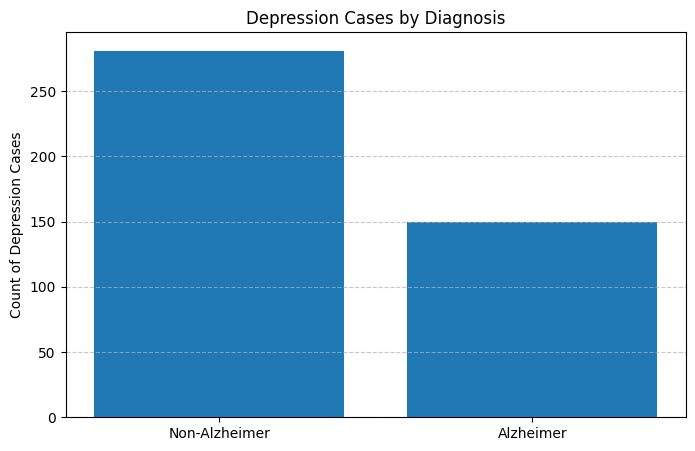

In [90]:
depression_counts = data.groupby('Diagnosis')['Depression'].sum()
plt.figure(figsize=(8, 5))
plt.bar(['Non-Alzheimer', 'Alzheimer'], depression_counts)
plt.ylabel('Count of Depression Cases')
plt.title('Depression Cases by Diagnosis')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


There is a significantly higher number of depression cases among non-Alzheimer's patients compared to Alzheimer's patients.

This suggests that depression might be more common in the general population than in those diagnosed with Alzheimer's, but further analysis is needed to understand the full relationship.


------

# What is the impact of having a family history of Alzheimer's on diagnosis?

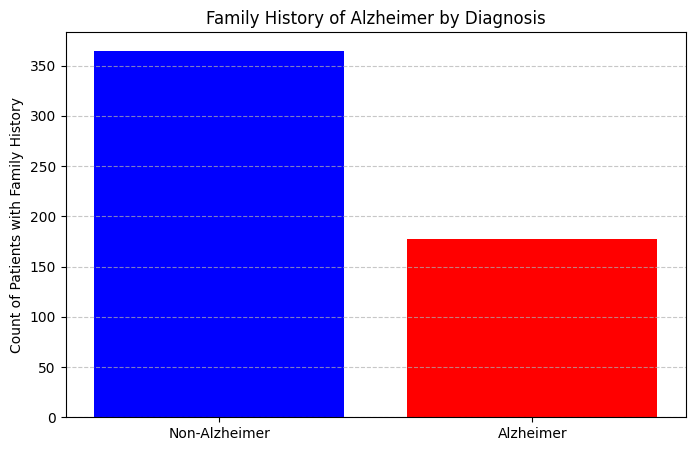

In [91]:
family_history_counts = data.groupby('Diagnosis')['FamilyHistoryAlzheimers'].sum()
plt.figure(figsize=(8, 5))
plt.bar(['Non-Alzheimer', 'Alzheimer'], family_history_counts, color=['blue', 'red'])
plt.ylabel('Count of Patients with Family History')
plt.title('Family History of Alzheimer by Diagnosis')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This bar chart shows that more non-Alzheimer's patients have a family history
of Alzheimer's than Alzheimer's patients themselves.

This suggests that a family history of Alzheimer's might be more common in the general population.


---

# What is the relationship between high blood pressure and Alzheimer's disease?



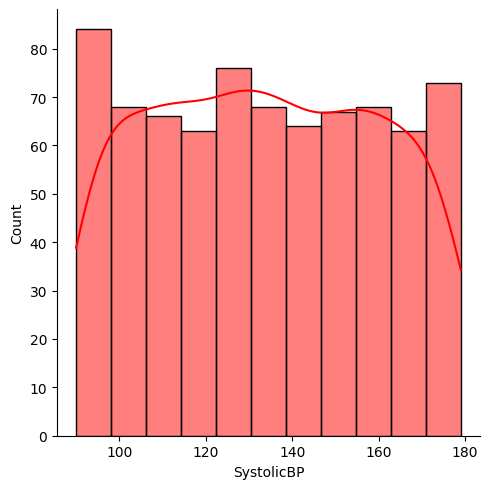

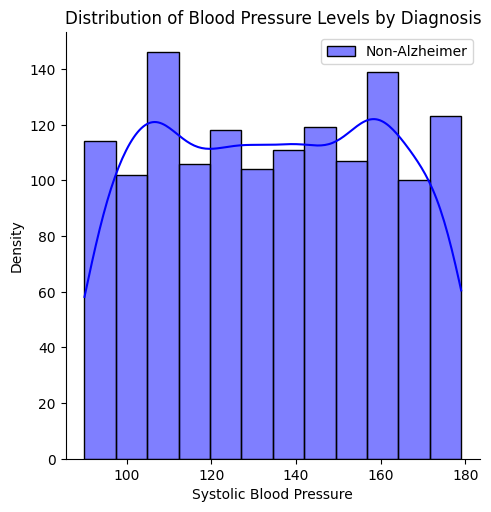

In [92]:
sns.displot(data[data['Diagnosis'] == 1]['SystolicBP'], kde=True, color='red', label='Alzheimer')

sns.displot(data[data['Diagnosis'] == 0]['SystolicBP'], kde=True, color='blue', label='Non-Alzheimer')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Density')
plt.title('Distribution of Blood Pressure Levels by Diagnosis')
plt.legend()
plt.show()

* In the first image, we see a general distribution of systolic blood pressure (SystolicBP), with no clear peak in any specific range.

* In the second image, the distribution of blood pressure for Alzheimer's patients shows higher levels compared to non-Alzheimer's individuals.

* This suggests that high blood pressure could be more prevalent in Alzheimer's patients, but further analysis is needed to confirm any direct correlation.

---

# Is there a correlation between memory complaints and diagnosis?

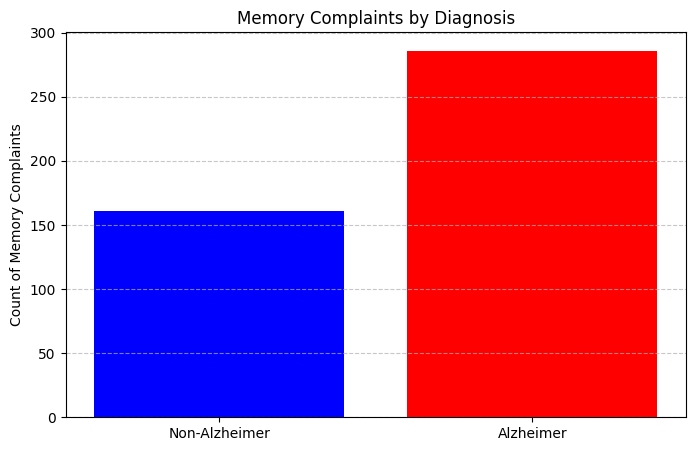

In [93]:
memory_complaints_counts = data.groupby('Diagnosis')['MemoryComplaints'].sum()
plt.figure(figsize=(8, 5))
plt.bar(['Non-Alzheimer', 'Alzheimer'], memory_complaints_counts, color=['blue', 'red'])
plt.ylabel('Count of Memory Complaints')
plt.title('Memory Complaints by Diagnosis')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Alzheimer's patients report more memory complaints than non-Alzheimer's individuals, which aligns with memory impairment being a key symptom of Alzheimer's.


---

# How does the level of education affect the incidence of Alzheimer's?



In [94]:
data['EducationLevel'].unique()

array([2, 0, 1, 3])

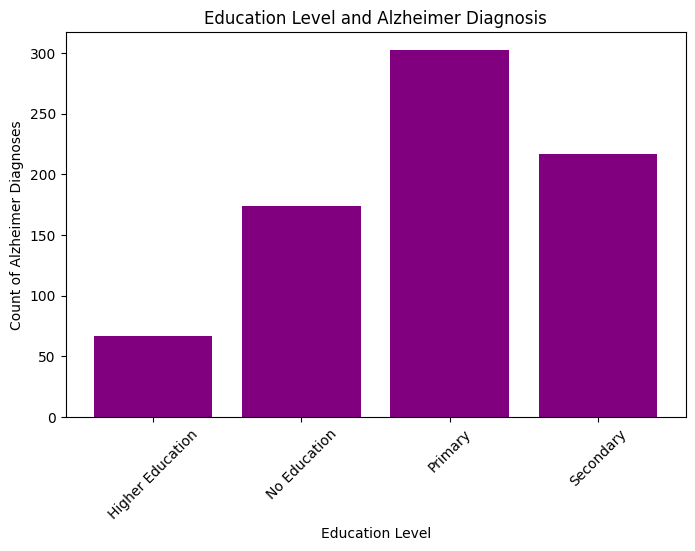

In [95]:
education_mapping = {
    0: "No Education",
    1: "Primary",
    2: "Secondary",
    3: "Higher Education",
    4: "Postgraduate"}

unique_education_levels = data['EducationLevel'].unique()
for level in unique_education_levels:
    if level not in education_mapping:
        education_mapping[level] = f"Unknown ({level})"

data['EducationLevelCategory'] = data['EducationLevel'].map(education_mapping)
education_counts = data.groupby('EducationLevelCategory')['Diagnosis'].sum()

plt.figure(figsize=(8, 5))
plt.bar(education_counts.index, education_counts.values, color='purple')
plt.xlabel('Education Level')
plt.ylabel('Count of Alzheimer Diagnoses')
plt.title('Education Level and Alzheimer Diagnosis')
plt.xticks(rotation=45)
plt.show()

This chart shows that Alzheimer's diagnoses are most common in individuals with primary or (no education), suggesting a possible link between lower education levels and higher Alzheimer's frequency.

---

# What is the relationship between diabetes and Alzheimer's disease?

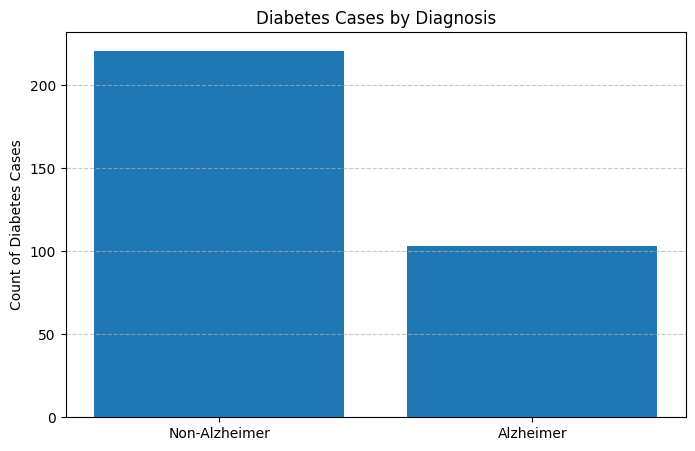

In [96]:
diabetes_counts = data.groupby('Diagnosis')['Diabetes'].sum()
plt.figure(figsize=(8, 5))
plt.bar(['Non-Alzheimer', 'Alzheimer'], diabetes_counts)
plt.ylabel('Count of Diabetes Cases')
plt.title('Diabetes Cases by Diagnosis')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

It shows that non-Alzheimer's individuals have a significantly higher number of diabetes cases compared to Alzheimer's patients.

This suggests that diabetes might be more common in the general population than in Alzheimer's patients, but further analysis is needed to understand the full relationship.


----

# How prevalent are behavioral problems among Alzheimer's patients?



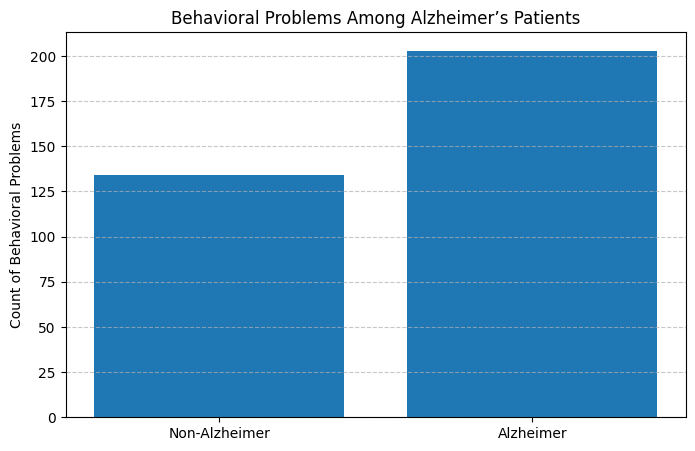

In [97]:
behavioral_counts = data.groupby('Diagnosis')['BehavioralProblems'].sum()

plt.figure(figsize=(8, 5))
plt.bar(['Non-Alzheimer', 'Alzheimer'], behavioral_counts)
plt.ylabel('Count of Behavioral Problems')
plt.title('Behavioral Problems Among Alzheimer’s Patients')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Alzheimer's patients report more behavioral problems than non-Alzheimer's individuals, which is common due to cognitive decline in Alzheimer's.

---

# How many patients have diabetes, hypertension, and cardiovascular disease?

In [98]:
diseases = ['Diabetes', 'Hypertension', 'CardiovascularDisease']
fig = make_subplots(rows=1, cols=3, subplot_titles=diseases)
for i, disease in enumerate(diseases, 1):
    disease_counts = data[disease].value_counts()
    fig.add_trace(go.Bar(x=disease_counts.index, y=disease_counts.values, name=disease), row=1, col=i)
fig.update_layout(title="Number of Patients with Diabetes, Hypertension, and Cardiovascular Disease", template="plotly_dark")
fig.show()

 The majority of patients have hypertension, followed by cardiovascular disease and diabetes. The prevalence of these conditions is high among the patient population.

----

# What is the relationship between age and cholesterol levels (total, LDL, HDL) among patients with Alzheimer's?


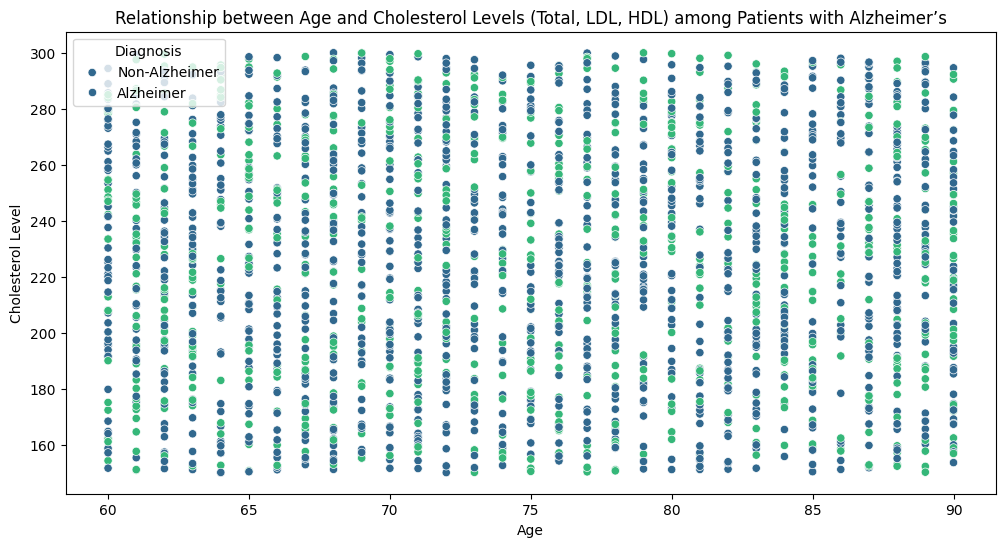

In [99]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Age', y='CholesterolTotal', hue='Diagnosis', palette='viridis')
plt.title('Relationship between Age and Cholesterol Levels (Total, LDL, HDL) among Patients with Alzheimer’s')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.legend(title='Diagnosis', labels=['Non-Alzheimer', 'Alzheimer'])

 There is no clear relationship between age and cholesterol levels (total, LDL, HDL) among patients with Alzheimer's.

# Machine Learning Model Development & Evaluation

In [100]:
categorical_columns = ['Gender', 'Ethnicity', 'EducationLevelCategory']

In [101]:
X = data.drop(columns=['Diagnosis', 'PatientID', 'DoctorInCharge', 'EducationLevelCategory'])
y = data['Diagnosis']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# Dictionary of models with additional models
models = {
    'Logistic Regression': LogisticRegression(n_jobs=-1, random_state=0),
    'K Nearest Neighbors': KNeighborsClassifier(n_jobs=-1),
    'Support Vector Machine': SVC(random_state=0),
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(n_jobs=-1, random_state=0),
    'Extra Trees': ExtraTreesClassifier(n_jobs=-1, random_state=0),
    'Bagging': BaggingClassifier(n_jobs=-1, random_state=0),
    'Hist Gradient Boosting': HistGradientBoostingClassifier(random_state=0),
    'AdaBoosting': AdaBoostClassifier(random_state=0),
    'XGBoost': XGBClassifier(use_label_encoder=True, eval_metric='logloss', random_state=0),
    'LightGBM': LGBMClassifier(random_state=0,verbose=0),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=0,iterations=1000),
}

In [104]:
def train_ML_algorithms(X_train, X_test, y_train, y_test, models,Balanced=False, cv=5, random_state=42):
    """
    Split the data into training and test sets, train ML models using cross-validation on the training set
    (with SMOTE applied only within each fold), and record performance metrics for both training and test sets.
    Also captures probability predictions when available.
    """

    results = []
    models_name = []
    predictions_dict = {}

    for name, model in tqdm(models.items()):
        # Create a pipeline that applies SMOTE and then the classifier.
        if Balanced :
            pipeline = Pipeline([
                ('smote', SMOTE(random_state=random_state)),
                ('clf', model)
            ])
        else:
            pipeline = Pipeline([
                ('clf', model)
            ])
        if cv != 0:
            # Set up stratified k-fold cross-validation on the training split.
            skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=random_state)

            # Compute cross-validation accuracy scores on the training data using the pipeline.
            cv_scores = cross_val_score(pipeline, X_train, y_train, cv=skf, scoring='f1_weighted')
            cv_accuracy = round(np.mean(cv_scores) * 100, 1)
        else:
            pipeline.fit(X_train, y_train)
            y_test_pred = pipeline.predict(X_test)
            cv_accuracy = round(f1_score(y_test, y_test_pred, average='weighted') * 100, 1)

        # Time the training process on training data using the pipeline.
        train_start_time = time.time()
        pipeline.fit(X_train, y_train)
        train_end_time = time.time()
        training_time = train_end_time - train_start_time

        # Make predictions on the training set.
        y_train_pred = pipeline.predict(X_train)
        # Make predictions on the test set and record prediction time.
        test_pred_start_time = time.time()
        y_test_pred = pipeline.predict(X_test)
        test_pred_end_time = time.time()
        test_pred_time = test_pred_end_time - test_pred_start_time

        # Initialize prediction dictionary.
        pred_dict = {
            "y_train": y_train,
            "y_test": y_test,
            "y_train_pred": y_train_pred,
            "y_test_pred": y_test_pred
        }

        # Try to get prediction probabilities if available.
        try:
            y_train_proba = pipeline.predict_proba(X_train)
            y_test_proba = pipeline.predict_proba(X_test)
            pred_dict["y_train_proba"] = y_train_proba
            pred_dict["y_test_proba"] = y_test_proba
        except (AttributeError, NotImplementedError):
            # Some models don't have predict_proba.
            pass

        # Save predictions for both training and test sets.
        predictions_dict[name] = pred_dict

        # Calculate performance metrics.
        accuracy_train = round(accuracy_score(y_train, y_train_pred)* 100, 1)
        precision_train = round(precision_score(y_train, y_train_pred, average='weighted')* 100, 1)
        recall_train = round(recall_score(y_train, y_train_pred, average='weighted')* 100, 1)
        f1_train = round(f1_score(y_train, y_train_pred, average='weighted')* 100, 1)

        accuracy_test = round(accuracy_score(y_test, y_test_pred)* 100, 3)
        precision_test = round(precision_score(y_test, y_test_pred, average='weighted')* 100, 1)
        recall_test = round(recall_score(y_test, y_test_pred, average='weighted')* 100, 1)
        f1_test = round(f1_score(y_test, y_test_pred, average='weighted')* 100, 1)

        models_name.append(name)
        results.append([
            cv_accuracy,
            accuracy_train, accuracy_test,
            precision_train, precision_test,
            recall_train, recall_test,
            f1_train, f1_test,
            training_time, test_pred_time
        ])

        print(f"\n{name}: CV F1_Score = {cv_accuracy:.2f}%, Train Acc = {accuracy_train:.2f}%, Test Acc = {accuracy_test:.2f}%")

    # Create a DataFrame to summarize model performance.
    Model_accuracy = pd.DataFrame(
        results,
        index=models_name,
        columns=[
            'CV F1_Score',
            'Train Accuracy', 'Test Accuracy',
            'Train Precision', 'Test Precision',
            'Train Recall', 'Test Recall',
            'Train F1 Score', 'Test F1 Score',
            'Training Time (s)', 'Test Prediction Time (s)'
        ]
    )

    return Model_accuracy, predictions_dict

In [105]:
def calculate_confidence_metrics(predictions_dict, threshold=0.7):
    """
    Calculate confidence metrics for each model based on prediction probabilities.
    Handles models that don't support predict_proba.

    Parameters:
        predictions_dict (dict): Dictionary containing predictions and probabilities
        threshold (float): Confidence threshold for high-confidence predictions

    Returns:
        pd.DataFrame: DataFrame with confidence metrics for each model
    """
    confidence_results = {}

    for model_name, pred_data in predictions_dict.items():
        metrics = {}

        # Check if probability data is available
        if "y_train_proba" in pred_data and "y_test_proba" in pred_data:
            # Training set confidence metrics
            train_proba = pred_data["y_train_proba"]
            train_max_proba = np.max(train_proba, axis=1)

            metrics["train_avg_confidence"] = round(np.mean(train_max_proba), 3)
            metrics["train_median_confidence"] = round(np.median(train_max_proba), 3)
            metrics["train_high_confidence_ratio"] = round(np.mean(train_max_proba >= threshold), 3)

            # Calculate confidence-weighted accuracy for training
            y_train = pred_data["y_train"]
            y_train_pred = pred_data["y_train_pred"]
            correct_train = (y_train == y_train_pred)
            metrics["train_confidence_weighted_accuracy"] = round(np.sum(correct_train * train_max_proba) / np.sum(train_max_proba), 3)

            # Test set confidence metrics
            test_proba = pred_data["y_test_proba"]
            test_max_proba = np.max(test_proba, axis=1)

            metrics["test_avg_confidence"] = round(np.mean(test_max_proba), 3)
            metrics["test_median_confidence"] = round(np.median(test_max_proba), 3)
            metrics["test_high_confidence_ratio"] = round(np.mean(test_max_proba >= threshold), 3)

            # Calculate confidence-weighted accuracy for test
            y_test = pred_data["y_test"]
            y_test_pred = pred_data["y_test_pred"]
            correct_test = (y_test == y_test_pred)
            metrics["test_confidence_weighted_accuracy"] = round(np.sum(correct_test * test_max_proba) / np.sum(test_max_proba), 3)
        else:
            # For models without predict_proba, use placeholder values
            metrics["train_avg_confidence"] = np.nan
            metrics["train_median_confidence"] = np.nan
            metrics["train_high_confidence_ratio"] = np.nan
            metrics["train_confidence_weighted_accuracy"] = np.nan
            metrics["test_avg_confidence"] = np.nan
            metrics["test_median_confidence"] = np.nan
            metrics["test_high_confidence_ratio"] = np.nan
            metrics["test_confidence_weighted_accuracy"] = np.nan

        confidence_results[model_name] = metrics

    # Convert to DataFrame
    conf_df = pd.DataFrame.from_dict(confidence_results, orient='index')

    return conf_df

In [106]:
def plot_models_accuracy_scores(Model_accuracy):
    """
    Enhanced visualization of model performance metrics with improved visual layout.

    Parameters:
        Model_accuracy (pd.DataFrame): DataFrame containing metrics for each model.

    Returns:
        None
    """

    # ============== Time Performance Visualization ==============
    fig, ax = plt.subplots(figsize=(12, 8))
    time_metrics = ['Training Time (s)', 'Test Prediction Time (s)']
    time_data = Model_accuracy[time_metrics]

    # Plot with logarithmic scale for better visibility
    time_data.plot(kind='bar', ax=ax, logy=True, width=0.8)

    # Customize plot
    plt.title('Model Computational Efficiency (Log Scale)', fontsize=14)
    plt.xlabel('Models', fontsize=12)
    plt.ylabel('Seconds (log scale)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Time Metrics')

    # Value annotations
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', label_type='edge',
                    padding=3, fontsize=8, rotation=90)

    plt.tight_layout()
    plt.show()

    # ============== Performance Metrics Comparison ==============
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    fig, axs = plt.subplots(2, 2, figsize=(18, 12))

    for idx, metric in enumerate(metrics):
        ax = axs[idx//2, idx%2]
        sorted_models = Model_accuracy.sort_values(f'Test {metric}', ascending=False)

        # Horizontal position
        y_pos = np.arange(len(sorted_models))
        bar_height = 0.4

        # Plot train/test comparison
        train_bars = ax.barh(y_pos - bar_height/2, sorted_models[f'Train {metric}'],
                            height=bar_height, color='#1f77b4', label='Train')
        test_bars = ax.barh(y_pos + bar_height/2, sorted_models[f'Test {metric}'],
                           height=bar_height, color='#ff7f0e', label='Test')

        # Customize subplot
        ax.set_title(f'{metric} Comparison', fontsize=13)
        ax.set_yticks(y_pos)
        ax.set_yticklabels(sorted_models.index)
        ax.set_xlim(0, 105)
        ax.grid(axis='x', alpha=0.4)

        # Annotate values
        for bars in [train_bars, test_bars]:
            for bar in bars:
                width = bar.get_width()
                ax.text(width + 1, bar.get_y() + bar.get_height()/2,
                       f'{width:.1f}', va='center', fontsize=9)

        if idx == 0:  # Only show legend once
            ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    plt.suptitle('Model Performance Metrics Comparison', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

    # ============== Compact Metric Overview ==============
    plt.figure(figsize=(14, 8))

    # Prepare data for combined metric visualization
    test_metrics = Model_accuracy[['Test Accuracy', 'Test Precision',
                                  'Test Recall', 'Test F1 Score']]
    train_metrics = Model_accuracy[['Train Accuracy', 'Train Precision',
                                   'Train Recall', 'Train F1 Score']]

    # Sort by test accuracy
    sorted_models = test_metrics.sort_values('Test Accuracy', ascending=False)

    # Plot all metrics in compact view
    x_pos = np.arange(len(sorted_models))
    for i, col in enumerate(test_metrics.columns):
        plt.plot(x_pos, sorted_models[col],
                marker='o', linestyle='--',
                label=col.replace('Test ', ''))

    plt.title('Combined Test Metric Trends', fontsize=14)
    plt.xlabel('Models (sorted by test accuracy)')
    plt.ylabel('Score')
    plt.xticks(x_pos, sorted_models.index, rotation=45, ha='right')
    plt.ylim(0, 102)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()


In [107]:
def display_metrics(predictions_dict, class_names, best_model_name=None):
    models_to_evaluate = [best_model_name] if best_model_name else predictions_dict.keys()
    num_classes = len(class_names)

    for model_name in models_to_evaluate:
        preds = predictions_dict[model_name]
        print(f"\n=== Metrics for Model: {model_name} ===")

        for split in ["train", "test"]:
            y_true = preds[f"y_{split}"]
            y_pred = preds[f"y_{split}_pred"]
            y_proba_key = f"y_{split}_proba"
            has_proba = y_proba_key in preds

            print(f"\n{split.capitalize()} Metrics:")
            print("Classification Report:")
            print(classification_report(y_true, y_pred, target_names=class_names))

            fig, axes = plt.subplots(1, 3, figsize=(20, 5))

            # Raw Confusion Matrix
            cm = confusion_matrix(y_true, y_pred)
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[0],
                        xticklabels=class_names, yticklabels=class_names)
            axes[0].set_title(f"{split.capitalize()} Confusion Matrix")
            axes[0].set_xlabel("Predicted")
            axes[0].set_ylabel("True")

            # Normalized Confusion Matrix
            cm_norm = confusion_matrix(y_true, y_pred, normalize="true")
            sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues", ax=axes[1],
                        xticklabels=class_names, yticklabels=class_names)
            axes[1].set_title(f"{split.capitalize()} Confusion Matrix (Normalized)")
            axes[1].set_xlabel("Predicted")
            axes[1].set_ylabel("True")

            # ROC Curve
            ax_roc = axes[2]
            if has_proba:
                y_score = preds[y_proba_key]
                try:
                    if num_classes == 2:
                        fpr, tpr, _ = roc_curve(y_true, y_score[:, 1])
                        auc_score = roc_auc_score(y_true, y_score[:, 1])
                        ax_roc.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
                        ax_roc.plot([0, 1], [0, 1], "k--")
                    else:
                        # Multi-class
                        y_true_bin = label_binarize(y_true, classes=range(num_classes))
                        auc_score = roc_auc_score(y_true_bin, y_score, average="macro", multi_class="ovr")
                        for i in range(num_classes):
                            fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
                            ax_roc.plot(fpr, tpr, label=f"{class_names[i]} (AUC={roc_auc_score(y_true_bin[:, i], y_score[:, i]):.2f})")
                        ax_roc.plot([0, 1], [0, 1], "k--")

                    ax_roc.set_title(f"{split.capitalize()} ROC Curve (AUC = {auc_score:.2f})")
                    ax_roc.set_xlabel("False Positive Rate")
                    ax_roc.set_ylabel("True Positive Rate")
                    ax_roc.legend()
                    ax_roc.grid()
                except Exception as e:
                    ax_roc.text(0.5, 0.5, f"Error computing ROC: {e}", ha='center', va='center')
                    ax_roc.axis("off")
            else:
                ax_roc.text(0.5, 0.5, f"No probability scores for {split}", ha='center', va='center')
                ax_roc.axis("off")

            plt.tight_layout()
            plt.show()


In [115]:
Model_accuracy, predictions_dict = train_ML_algorithms(X_train, X_test, y_train, y_test, models,Balanced=False,cv=0)

  8%|▊         | 1/12 [00:00<00:03,  3.14it/s]


Logistic Regression: CV F1_Score = 75.30%, Train Acc = 77.80%, Test Acc = 76.05%


 17%|█▋        | 2/12 [00:00<00:05,  1.94it/s]


K Nearest Neighbors: CV F1_Score = 51.60%, Train Acc = 74.50%, Test Acc = 53.95%


 33%|███▎      | 4/12 [00:02<00:04,  1.72it/s]


Support Vector Machine: CV F1_Score = 50.50%, Train Acc = 64.70%, Test Acc = 64.42%

Decision Tree: CV F1_Score = 88.60%, Train Acc = 100.00%, Test Acc = 88.61%


 42%|████▏     | 5/12 [00:05<00:09,  1.33s/it]


Random Forest: CV F1_Score = 92.70%, Train Acc = 100.00%, Test Acc = 92.79%


 50%|█████     | 6/12 [00:07<00:09,  1.55s/it]


Extra Trees: CV F1_Score = 85.40%, Train Acc = 100.00%, Test Acc = 85.81%


 58%|█████▊    | 7/12 [00:07<00:06,  1.33s/it]


Bagging: CV F1_Score = 94.20%, Train Acc = 99.40%, Test Acc = 94.19%


 67%|██████▋   | 8/12 [00:11<00:08,  2.03s/it]


Hist Gradient Boosting: CV F1_Score = 95.50%, Train Acc = 100.00%, Test Acc = 95.58%


 75%|███████▌  | 9/12 [00:13<00:06,  2.18s/it]


AdaBoosting: CV F1_Score = 91.60%, Train Acc = 93.80%, Test Acc = 91.63%


 83%|████████▎ | 10/12 [00:16<00:04,  2.35s/it]


XGBoost: CV F1_Score = 94.80%, Train Acc = 100.00%, Test Acc = 94.88%


 92%|█████████▏| 11/12 [00:17<00:02,  2.03s/it]


LightGBM: CV F1_Score = 95.60%, Train Acc = 100.00%, Test Acc = 95.58%


100%|██████████| 12/12 [00:45<00:00,  3.81s/it]


CatBoost: CV F1_Score = 95.30%, Train Acc = 98.90%, Test Acc = 95.35%


In [116]:
Model_accuracy.sort_values(by='CV F1_Score',ascending=False,inplace=True)
Model_accuracy

,CV F1_Score,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score,Training Time (s),Test Prediction Time (s)
LightGBM,95.6,100.0,95.581,100.0,95.6,100.0,95.6,100.0,95.6,0.400853,0.011598
Hist Gradient Boosting,95.5,100.0,95.581,100.0,95.6,100.0,95.6,100.0,95.5,1.805958,0.039477
CatBoost,95.3,98.9,95.349,98.9,95.4,98.9,95.3,98.9,95.3,10.197382,0.003465
XGBoost,94.8,100.0,94.884,100.0,94.9,100.0,94.9,100.0,94.8,1.752222,0.028822
Bagging,94.2,99.4,94.186,99.4,94.2,99.4,94.2,99.4,94.2,0.274245,0.030010
Random Forest,92.7,100.0,92.791,100.0,93.0,100.0,92.8,100.0,92.7,1.164721,0.083251
AdaBoosting,91.6,93.8,91.628,93.8,91.6,93.8,91.6,93.8,91.6,0.958591,0.028910
Decision Tree,88.6,100.0,88.605,100.0,88.6,100.0,88.6,100.0,88.6,0.055032,0.004360
Extra Trees,85.4,100.0,85.814,100.0,86.1,100.0,85.8,100.0,85.4,0.842303,0.048938
Logistic Regression,75.3,77.8,76.047,77.3,75.5,77.8,76.0,77.1,75.3,0.103525,0.003179


In [117]:
# Calculate the overall average for each model across Train and Test
Model_accuracy["Overall Accuracy"] = Model_accuracy[["Train Accuracy", "Test Accuracy"]].mean(axis=1).round(1)
Model_accuracy["Overall Precision"] = Model_accuracy[["Train Precision", "Test Precision"]].mean(axis=1).round(1)
Model_accuracy["Overall Recall"] = Model_accuracy[["Train Recall", "Test Recall"]].mean(axis=1).round(1)
Model_accuracy["Overall F1 Score"] = Model_accuracy[["Train F1 Score", "Test F1 Score"]].mean(axis=1).round(1)

# Display the updated DataFrame with overall metrics
model_overall = Model_accuracy[["CV F1_Score","Overall Accuracy", "Overall Precision", "Overall Recall", "Overall F1 Score"]]
model_overall

,CV F1_Score,Overall Accuracy,Overall Precision,Overall Recall,Overall F1 Score
LightGBM,95.6,97.8,97.8,97.8,97.8
Hist Gradient Boosting,95.5,97.8,97.8,97.8,97.8
CatBoost,95.3,97.1,97.2,97.1,97.1
XGBoost,94.8,97.4,97.4,97.4,97.4
Bagging,94.2,96.8,96.8,96.8,96.8
Random Forest,92.7,96.4,96.5,96.4,96.4
AdaBoosting,91.6,92.7,92.7,92.7,92.7
Decision Tree,88.6,94.3,94.3,94.3,94.3
Extra Trees,85.4,92.9,93.0,92.9,92.7
Logistic Regression,75.3,76.9,76.4,76.9,76.2


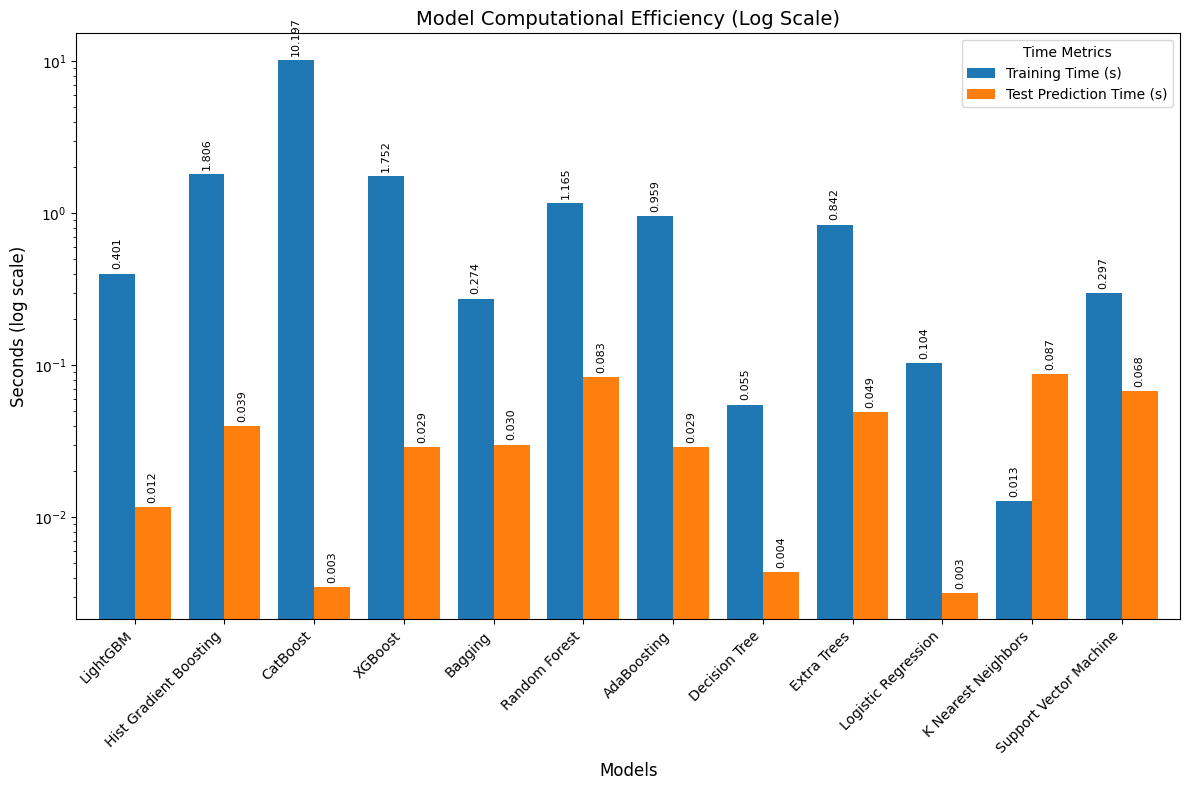

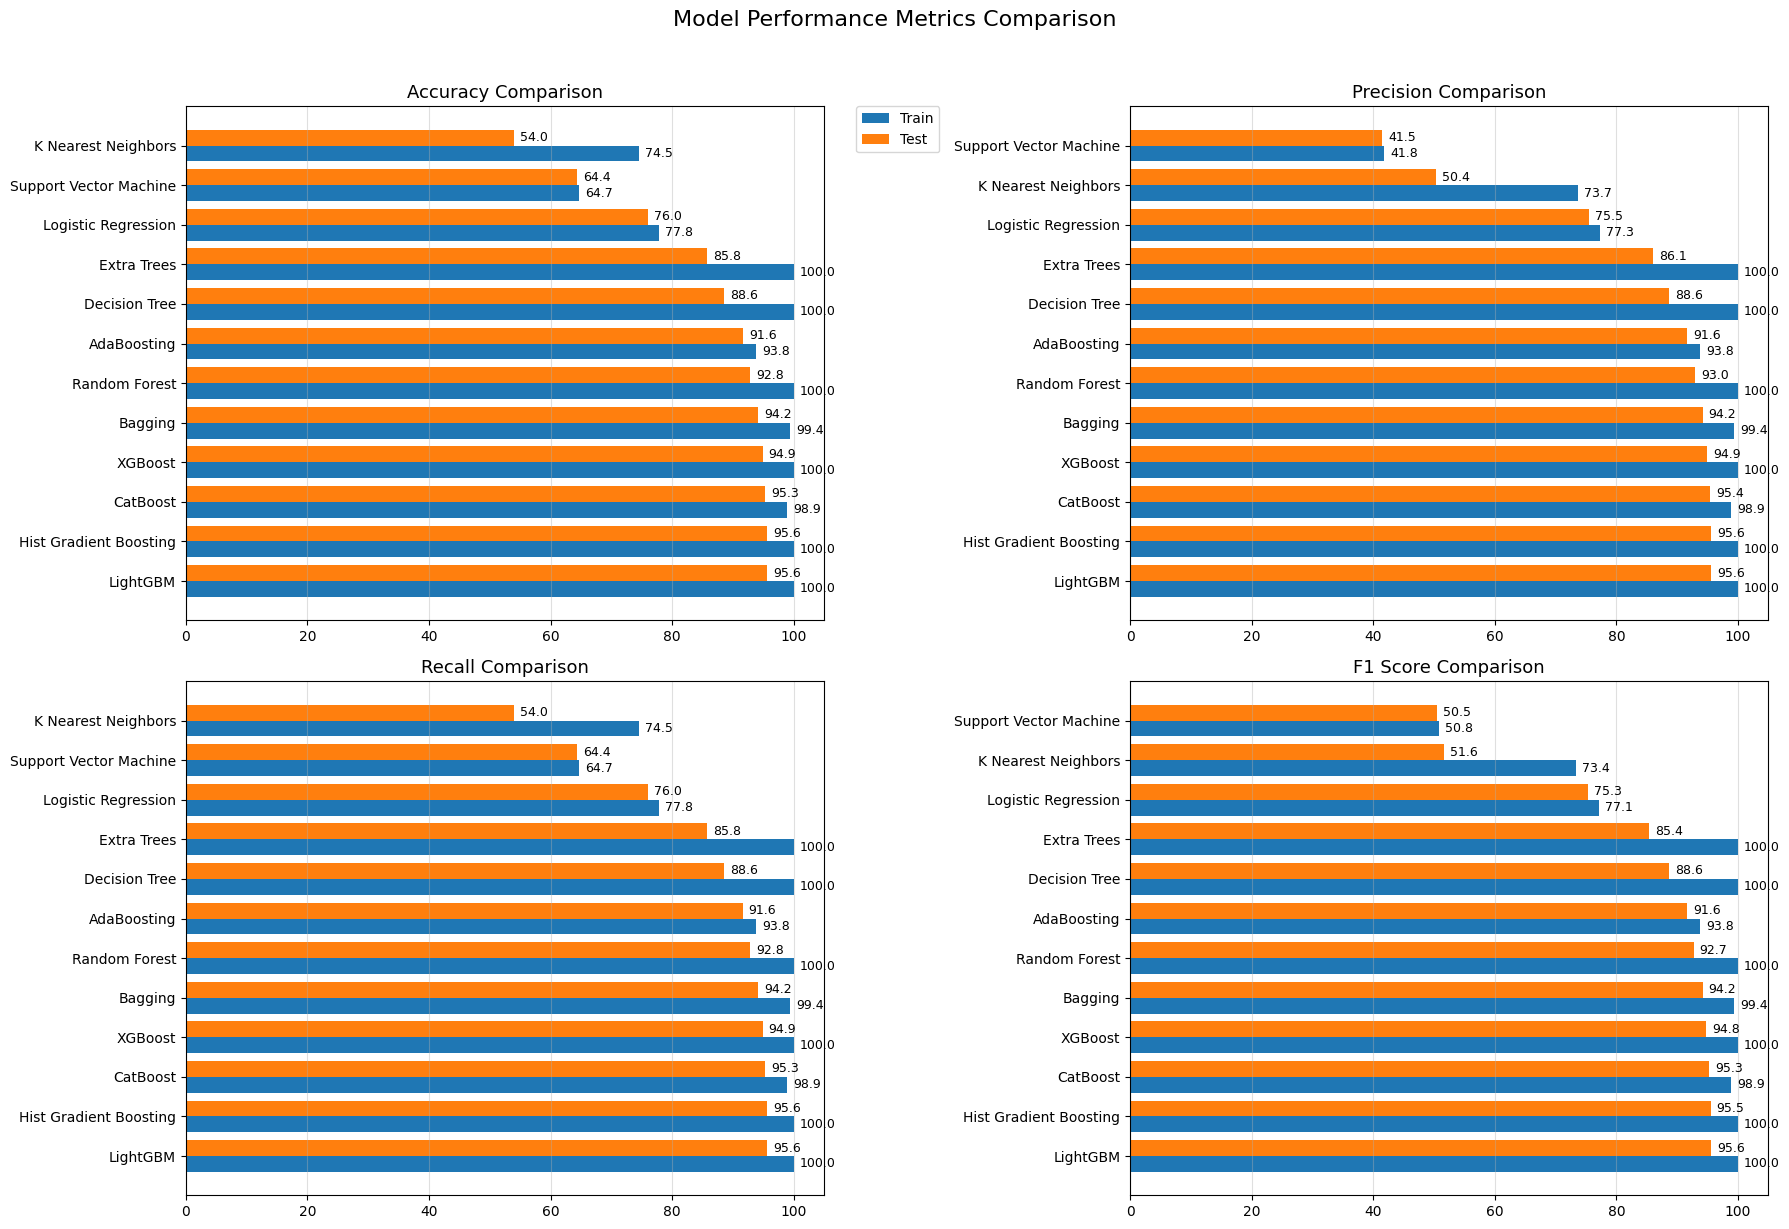

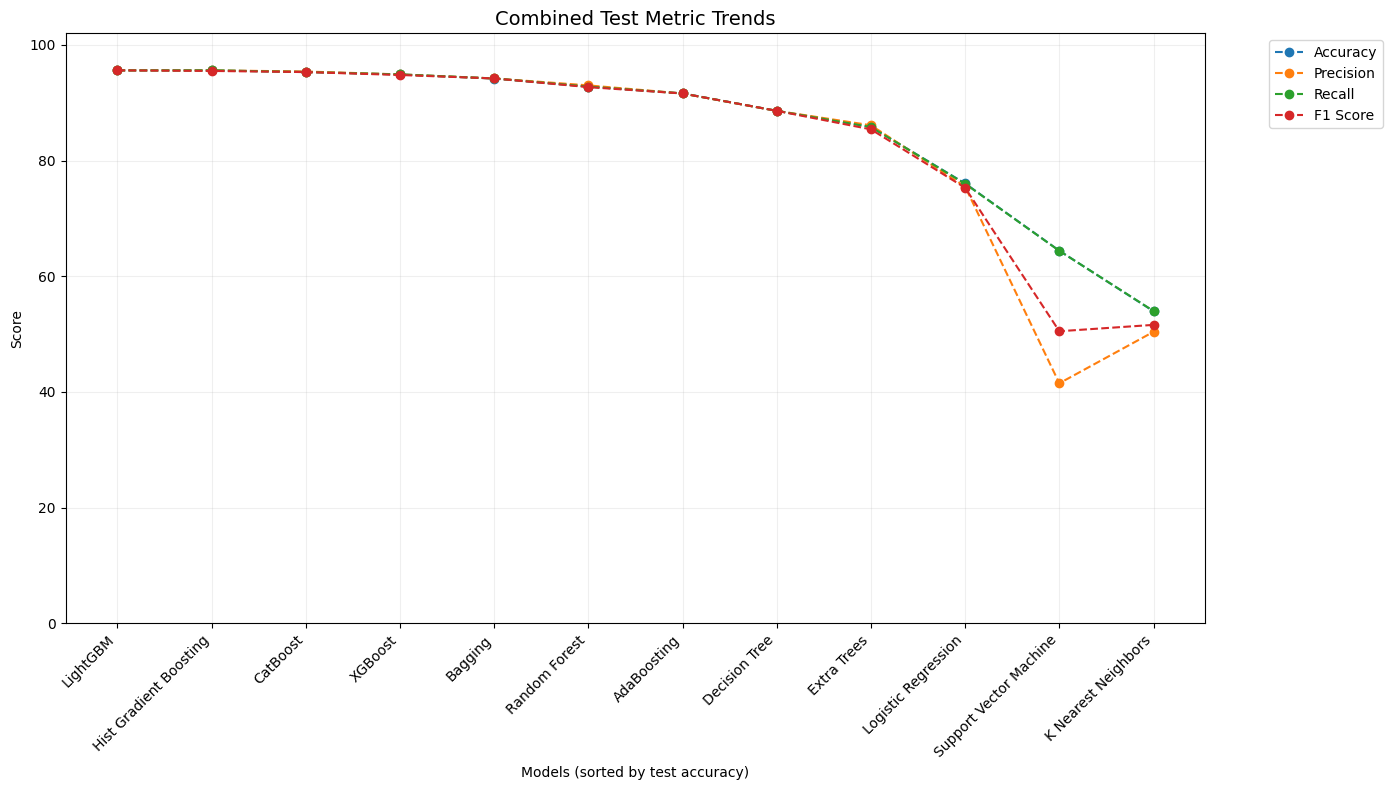

In [118]:
plot_models_accuracy_scores(Model_accuracy)


=== Metrics for Model: LightGBM ===

Train Metrics:
Classification Report:
               precision    recall  f1-score   support

    Alzheimer       1.00      1.00      1.00      1112
Non-Alzheimer       1.00      1.00      1.00       607

     accuracy                           1.00      1719
    macro avg       1.00      1.00      1.00      1719
 weighted avg       1.00      1.00      1.00      1719



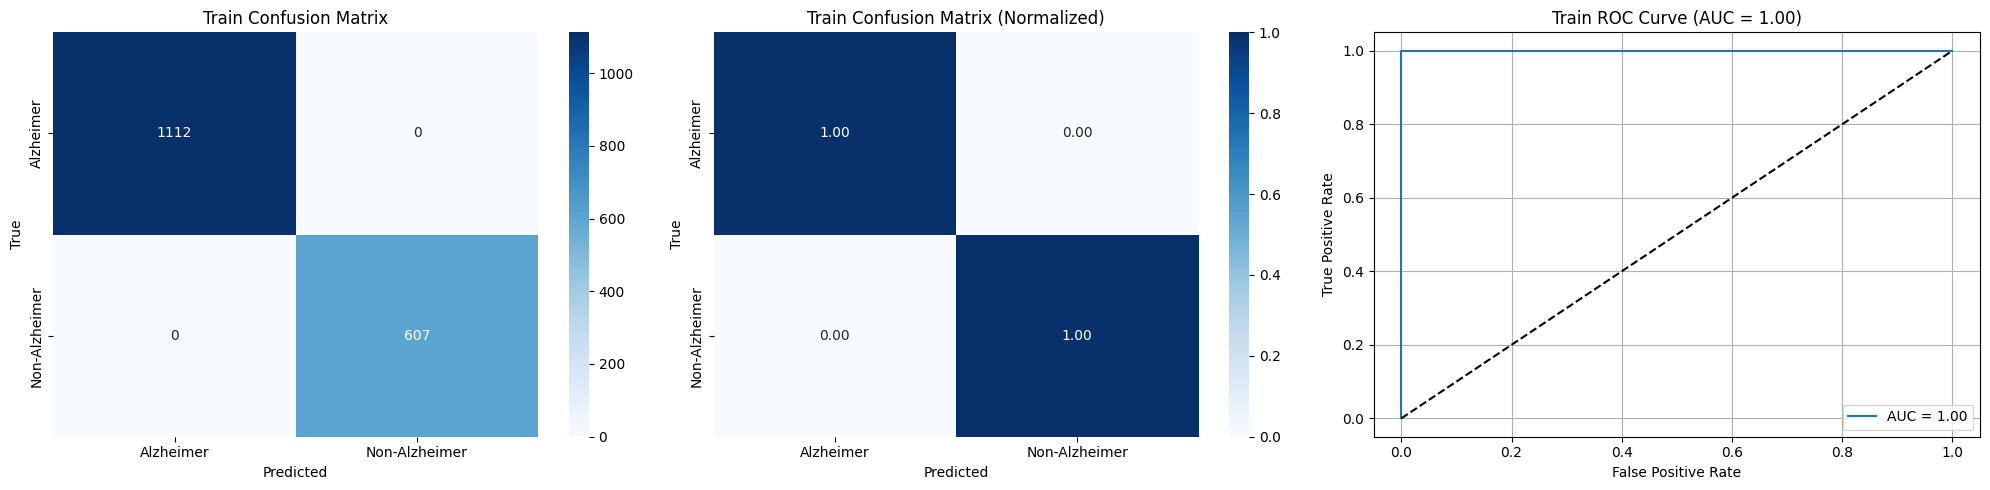


Test Metrics:
Classification Report:
               precision    recall  f1-score   support

    Alzheimer       0.95      0.98      0.97       277
Non-Alzheimer       0.96      0.92      0.94       153

     accuracy                           0.96       430
    macro avg       0.96      0.95      0.95       430
 weighted avg       0.96      0.96      0.96       430



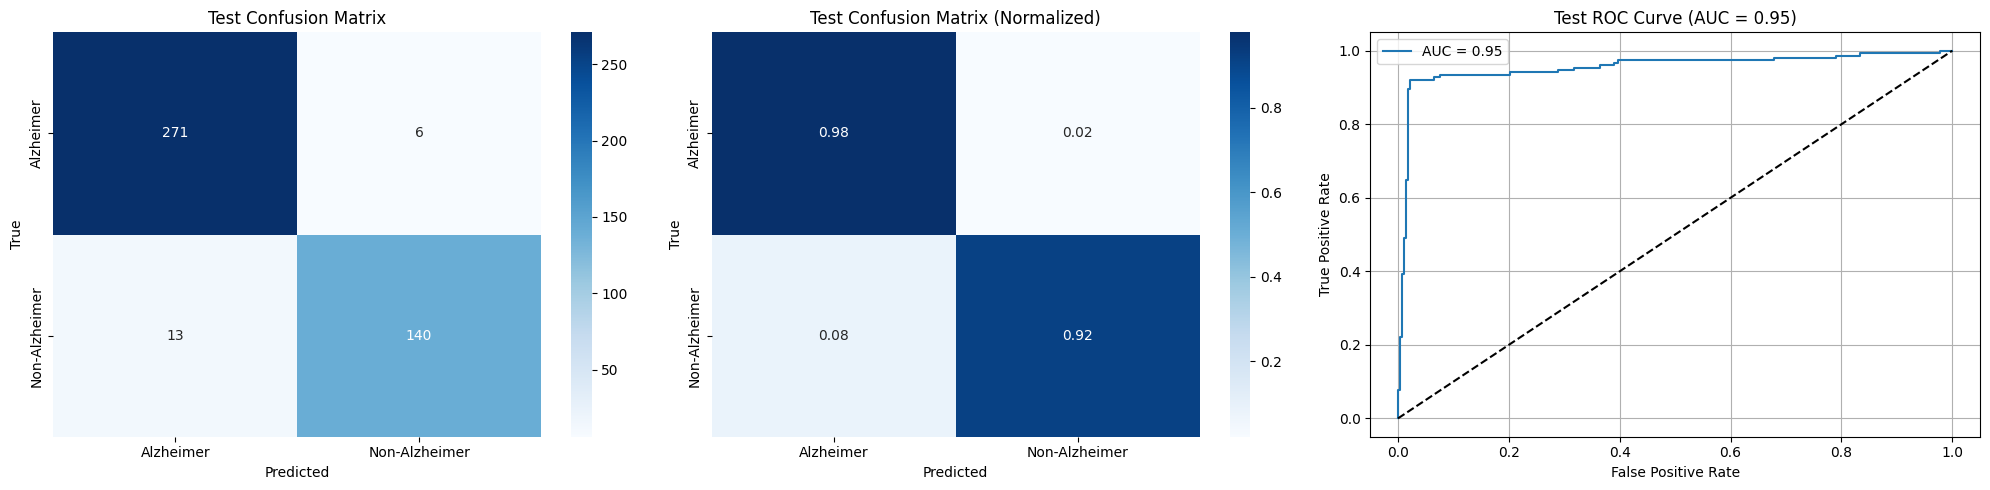

In [119]:
display_metrics(predictions_dict,class_names=['Alzheimer','Non-Alzheimer' ], best_model_name=Model_accuracy.index[0])

In [120]:
Model_accuracy.to_csv('models accuracy.csv')

In [121]:
# Example usage after getting predictions_dict:
confidence_results = calculate_confidence_metrics(predictions_dict)

# Convert to DataFrame for easier viewing and saving
conf_df_rows = []
for model_name, metrics in confidence_results.items():
    metrics_row = {"Model": model_name}
    metrics_row.update(metrics)
    conf_df_rows.append(metrics_row)

confidence_df = pd.DataFrame(conf_df_rows)
confidence_df.set_index("Model", inplace=True)

# Print and save results

confidence_df.to_csv("model_confidence_metrics.csv")
confidence_df

,Logistic Regression,K Nearest Neighbors,Support Vector Machine,Decision Tree,Random Forest,Extra Trees,Bagging,Hist Gradient Boosting,AdaBoosting,XGBoost,LightGBM,CatBoost
Model,,,,,,,,,,,,
train_avg_confidence,0.761,0.720,NaN,1.000,0.916,1.000,0.961,0.992,0.609,0.993,0.992,0.952
train_median_confidence,0.776,0.600,NaN,1.000,0.930,1.000,1.000,0.997,0.585,0.997,0.996,0.971
train_high_confidence_ratio,0.639,0.477,NaN,1.000,0.984,1.000,0.975,1.000,0.121,1.000,1.000,0.973
train_confidence_weighted_accuracy,0.805,0.770,NaN,1.000,1.000,1.000,0.996,1.000,0.942,1.000,1.000,0.993
test_avg_confidence,0.758,0.714,NaN,1.000,0.803,0.733,0.932,0.976,0.609,0.976,0.975,0.942
test_median_confidence,0.759,0.600,NaN,1.000,0.830,0.740,1.000,0.995,0.582,0.996,0.995,0.964
test_high_confidence_ratio,0.614,0.458,NaN,1.000,0.821,0.607,0.953,0.981,0.126,0.988,0.979,0.979
test_confidence_weighted_accuracy,0.783,0.555,NaN,0.886,0.937,0.881,0.948,0.957,0.920,0.952,0.957,0.956
